# Image Compression by K-Means Clustering

In this project, we tackle the image compression problem using **K-Means Clustering**.

K-Means Clustering is a clustering algorithm which clusters the given data points to k clusters. K-Means's aim is to optimize the position of the cluster centriods, which minimizes the cost function used e.g. sum of squared distances. K-Means works in an iterative way. First, it starts with randomly assigned cluster centriods, iteratively optimizes the position of the centriods. K-means stops when it converges or when the maximum number of iterations is reached.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.cluster import KMeans
from PIL import Image
import webcolors

## Reading and Processing the Images

In [2]:
image_names = ['baboon.png', 'flowers.png', 'graffiti.jpg', 'lena.png', 'umbrella.jpg']
def read_images():
    """This function reads the images, resizes them, and reshapes them into 2-d arrays."""
    img_arrs = {}
    for img_name in image_names:
        im = cv2.imread(img_name) # reading
        im_resized = cv2.resize(im, (256, 256)) # resizing 
        im_resized_reshaped = im_resized.reshape((256 * 256), 3) # reshaping
        img_arrs[img_name] = [im, im_resized, im_resized_reshaped]
    return img_arrs 

In [3]:
img_arrs = read_images()

## Discovering The Data

#### Visualizing the Photos

In [4]:
def show_img(im, resize=False):
    if resize: im = im.astype(np.float32)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()

Photo: baboon.png


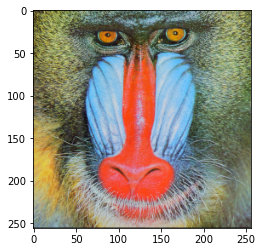

Photo: flowers.png


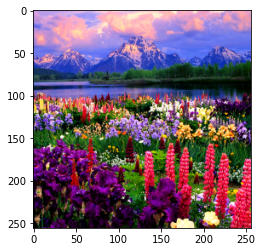

Photo: graffiti.jpg


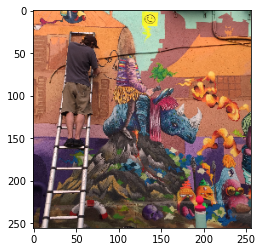

Photo: lena.png


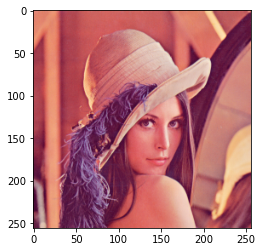

Photo: umbrella.jpg


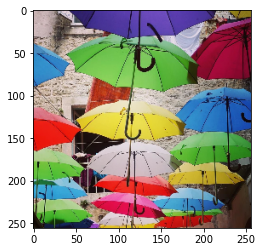

In [5]:
for img_name in image_names:
    img = img_arrs[img_name][1]
    print(f'Photo: {img_name}')
    show_img(img)

#### Size of Images in Bytes

In [6]:
for img in image_names:  
    print(f'{img}: {os.stat(img).st_size} bytes')

baboon.png: 651142 bytes
flowers.png: 615128 bytes
graffiti.jpg: 1075269 bytes
lena.png: 473831 bytes
umbrella.jpg: 279534 bytes


#### Number of Unique Color

In [7]:
for image_name in image_names: 
    img = img_arrs[image_name][1]
    u = np.unique(img.reshape(-1, img.shape[-1]), axis=0, return_counts=True)
    print(f'{image_name}: {len(u[1])} colors')

baboon.png: 62070 colors
flowers.png: 57848 colors
graffiti.jpg: 47091 colors
lena.png: 48331 colors
umbrella.jpg: 49461 colors


### Modelling

In [8]:
def compress_pic(image_name):
    """This function compresses the image with various values of K 1-8 and
        populates a dict with the compressed imgs' models and compressed pictures"""
    img = img_arrs[image_name][2]
    compressed_imgs[image_name] = []
    for k in range(1, 9):
        model, res = cluster_pixels(img, k)
        compressed_imgs[image_name].append((model, res))

def cluster_pixels(img, k): 
    """This function initializes K-means, fits it to an images, and returns
        the model and the compressed pic"""
    kmeans = KMeans(n_clusters=2**k, random_state=0)
    kmeans.fit(img)
    clus_pix = {idx:pix.astype(np.uint8) for idx, pix in enumerate(kmeans.cluster_centers_)} 
    assigned_clus = np.zeros(shape=img.shape)
    for idx, (pixel, label) in enumerate(zip(img, kmeans.labels_)):     
        assigned_clus[idx] = clus_pix[int(label)]  
    return kmeans, assigned_clus.reshape((256, 256, 3))/255

def get_compressed_img_size(img_names):
    """This function gets the size of a compressed images. 
        It first saves it then opens and calculates the size"""
    img_sizes = [] 
    for _, img in compressed_imgs[img_name]: 
        rescaled = (255.0 / img.max() * (img- img.min())).astype(np.uint8)
        img = Image.fromarray(rescaled)
        ii = img.save('test.png')
        iii = Image.open('test.png')
        size = len(iii.fp.read())
        img_sizes.append(size)
    return img_sizes

#### Compressing the Images

In [9]:
compressed_imgs = {}
for img_name in image_names:
    compress_pic(img_name)
    print(f'Done: {img_name}')

Done: baboon.png
Done: flowers.png
Done: graffiti.jpg
Done: lena.png
Done: umbrella.jpg


#### Finding the size of the compressed Images

In [10]:
imgname_compressed_sizes = {}
for img_name in image_names:
    print(f'Image Name: {img_name}')
    img_sizes = get_compressed_img_size(img_name)
    imgname_compressed_sizes[img_name] = img_sizes
    for idx, size in enumerate(img_sizes):
        print(f'K={idx+1}: {size} bytes')

Image Name: baboon.png
K=1: 10574 bytes
K=2: 16499 bytes
K=3: 28989 bytes
K=4: 45594 bytes
K=5: 69740 bytes
K=6: 98542 bytes
K=7: 124274 bytes
K=8: 140838 bytes
Image Name: flowers.png
K=1: 8490 bytes
K=2: 15386 bytes
K=3: 27832 bytes
K=4: 44421 bytes
K=5: 67643 bytes
K=6: 89185 bytes
K=7: 108955 bytes
K=8: 124170 bytes
Image Name: graffiti.jpg
K=1: 8843 bytes
K=2: 16164 bytes
K=3: 29821 bytes
K=4: 45557 bytes
K=5: 62929 bytes
K=6: 80733 bytes
K=7: 98757 bytes
K=8: 115624 bytes
Image Name: lena.png
K=1: 5371 bytes
K=2: 11320 bytes
K=3: 19610 bytes
K=4: 29430 bytes
K=5: 45204 bytes
K=6: 64144 bytes
K=7: 84053 bytes
K=8: 99407 bytes
Image Name: umbrella.jpg
K=1: 7415 bytes
K=2: 11694 bytes
K=3: 18277 bytes
K=4: 26125 bytes
K=5: 38945 bytes
K=6: 52992 bytes
K=7: 70465 bytes
K=8: 85140 bytes


#### Visualize the Compressed Images

Image Name: baboon.png
K=1


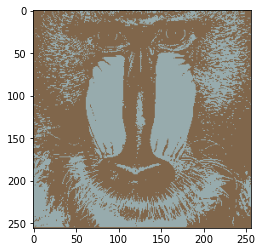

K=2


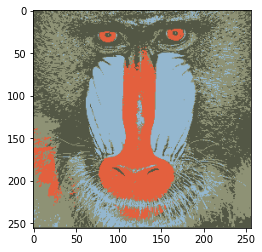

K=3


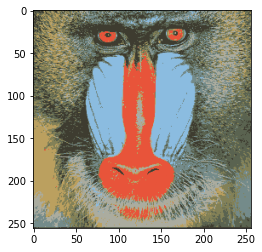

K=4


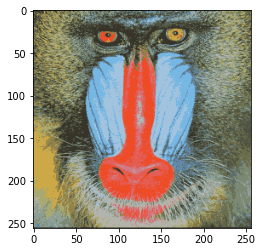

K=5


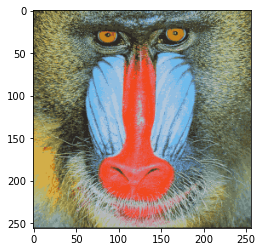

K=6


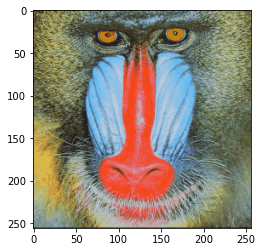

K=7


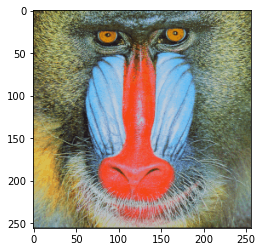

K=8


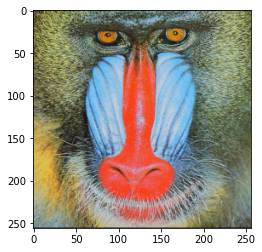

Image Name: flowers.png
K=1


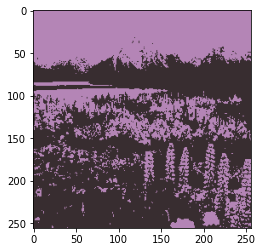

K=2


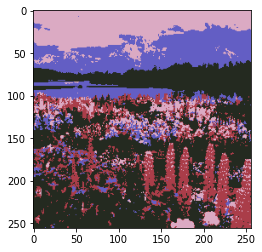

K=3


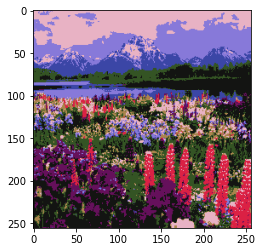

K=4


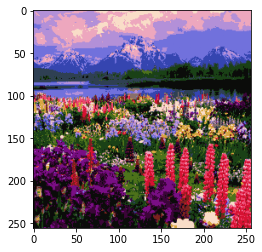

K=5


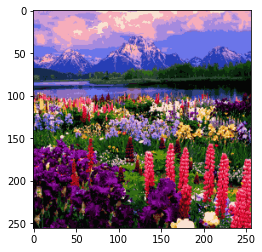

K=6


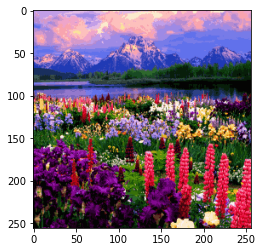

K=7


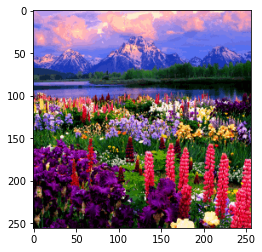

K=8


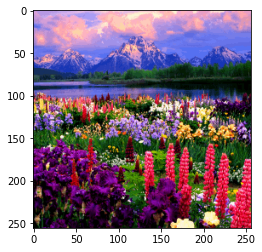

Image Name: graffiti.jpg
K=1


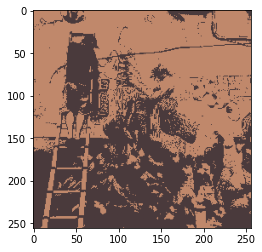

K=2


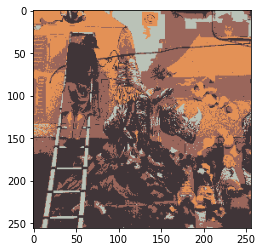

K=3


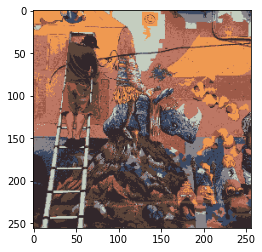

K=4


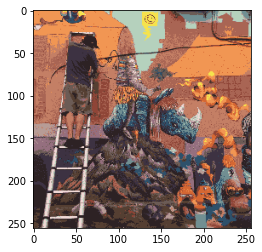

K=5


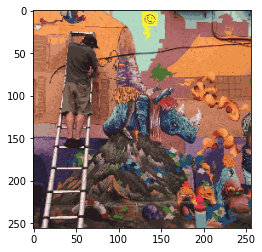

K=6


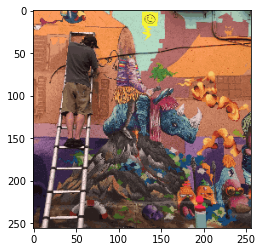

K=7


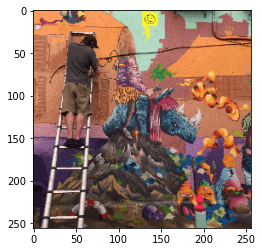

K=8


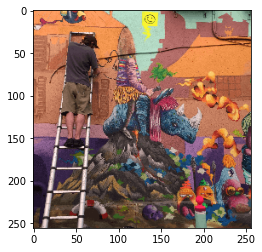

Image Name: lena.png
K=1


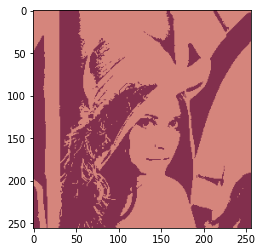

K=2


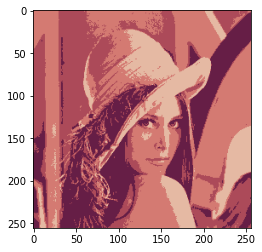

K=3


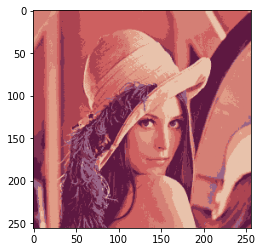

K=4


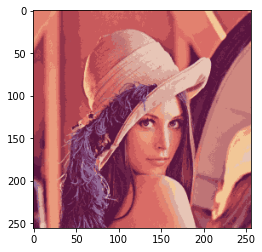

K=5


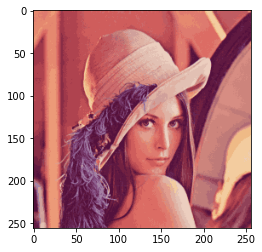

K=6


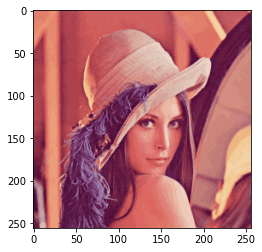

K=7


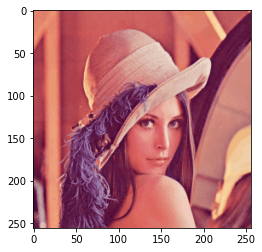

K=8


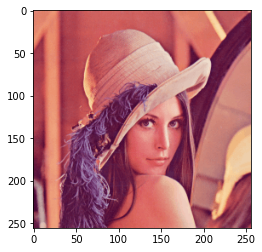

Image Name: umbrella.jpg
K=1


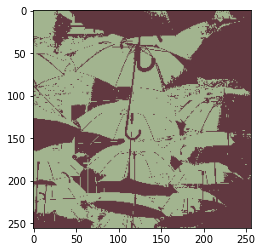

K=2


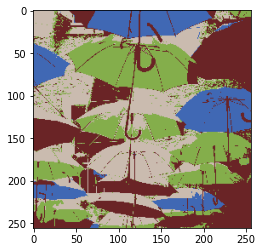

K=3


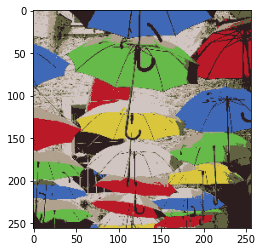

K=4


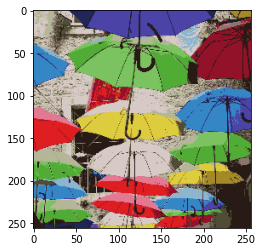

K=5


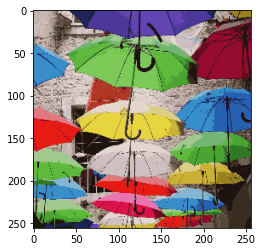

K=6


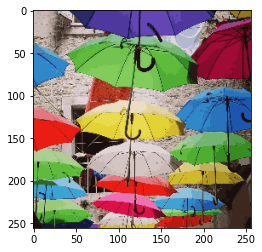

K=7


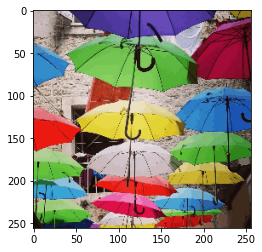

K=8


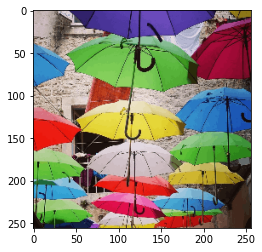

In [11]:
for img_name in image_names: 
    print(f'Image Name: {img_name}')
    compressed = compressed_imgs[img_name]
    for idx, (_, img) in enumerate(compressed):
        print(f'K={idx+1}')
        show_img(img, resize=True)

#### Metrics: WCSS, BCSS, and Explained Variance. 

##### WCSS: Within Cluster Sum of Squares

In [12]:
def get_wcss(img_name):
    """This function returns all the wcss scores of one img (8 different k values)"""
    wcss_ks = []
    for model, _ in compressed_imgs[img_name]:
        wcss_ks.append(calculate_wcss(model, img_arrs[img_name][2]))
    return [(idx, wcss) for idx, wcss in enumerate(wcss_ks)] 

def calculate_wcss(model, img): 
    """This function calculates the wcss for a single img"""
    res = 0
    for idx, cluster in enumerate(model.cluster_centers_): 
        clust_pts = np.array([i[0] for i in list(zip(img, model.labels_)) if i[1] == idx])
        res += np.sum((clust_pts-cluster)**2)
    return res 

In [13]:
imgname_wcss = {}
for img_name in image_names: 
    print(f'Image Name: {img_name}')
    k_wcss = get_wcss(img_name)
    imgname_wcss[img_name] = k_wcss
    for idx, wcss in enumerate(k_wcss):
        print(f'K={idx+1}: {wcss[1]}')

Image Name: baboon.png
K=1: 303681463.97304755
K=2: 123322231.07790041
K=3: 63294263.21435225
K=4: 34268294.33128986
K=5: 19423693.552675717
K=6: 11768827.639587035
K=7: 7451718.051547907
K=8: 4724506.358900095
Image Name: flowers.png
K=1: 488349738.8316122
K=2: 257573939.12283832
K=3: 139465802.796018
K=4: 75655255.7519426
K=5: 42600423.24366237
K=6: 25193087.18706888
K=7: 15290142.40691947
K=8: 9332285.690656258
Image Name: graffiti.jpg
K=1: 233127263.07993394
K=2: 115468470.44003087
K=3: 64731891.3165238
K=4: 38465777.34613209
K=5: 21547087.488297835
K=6: 11807403.680300416
K=7: 6693994.640664835
K=8: 3962399.307919212
Image Name: lena.png
K=1: 146948625.04975373
K=2: 51532440.78812408
K=3: 24526108.277114876
K=4: 12297854.87798275
K=5: 6590001.017529091
K=6: 3847779.7268842664
K=7: 2383013.685299609
K=8: 1496036.2525108592
Image Name: umbrella.jpg
K=1: 539424679.6596041
K=2: 280802207.793252
K=3: 119468879.52407062
K=4: 57654789.469783984
K=5: 28254006.45936616
K=6: 14190619.229322

##### BCSS: Between Cluster Sum of Squares

In [14]:
def get_bcss(img_name):
    """This function returns all the bcss scores of one img (8 different k values)"""
    bcss_ks = []
    for model, _ in compressed_imgs[img_name]:
        bcss_ks.append(calculate_bcss(model, img_arrs[img_name][2]))
    return [(idx, bcss) for idx, bcss in enumerate(bcss_ks)]

def calculate_bcss(model, img):
    """This function calculates the bcss for a single img"""
    res = 0
    mean = np.mean(img, axis=0)
    for idx, cluster in enumerate(model.cluster_centers_):
        clust_pts = np.array([i[0] for i in list(zip(img, model.labels_)) if i[1] == idx])
        res += np.sum(np.subtract(mean, cluster) ** 2) * len(clust_pts)
    return res

In [15]:
imgname_bcss = {}
for img_name in image_names: 
    print(f'Image Name: {img_name}')
    k_bcss = get_bcss(img_name)
    imgname_bcss[img_name] = k_bcss 
    for idx, bcss in enumerate(k_bcss):
        print(f'K={idx+1}: {bcss[1]}')

Image Name: baboon.png
K=1: 230823229.9389689
K=2: 411229248.4659387
K=3: 471008752.3379159
K=4: 499695689.1285224
K=5: 514837678.41018486
K=6: 522488066.61412257
K=7: 526809999.7014383
K=8: 529575914.47598493
Image Name: flowers.png
K=1: 656408292.5335073
K=2: 887169202.5933589
K=3: 1005208000.8525786
K=4: 1069110284.8143615
K=5: 1101986428.5956104
K=6: 1119051655.0761437
K=7: 1129233584.6420174
K=8: 1135201421.9648
Image Name: graffiti.jpg
K=1: 360383604.70925343
K=2: 477970470.30960506
K=3: 528982129.5830949
K=4: 555132498.3948572
K=5: 571909522.9472598
K=6: 581592487.100216
K=7: 586792952.7506208
K=8: 589511164.6953666
Image Name: lena.png
K=1: 260016667.33709523
K=2: 355864699.85826784
K=3: 382613121.7112839
K=4: 394953856.9566671
K=5: 400445349.1921489
K=6: 403237681.54699033
K=7: 404687652.1487296
K=8: 405613146.02620333
Image Name: umbrella.jpg
K=1: 417013005.71172947
K=2: 676254452.6626887
K=3: 837010477.3555324
K=4: 898998459.3292767
K=5: 928479847.7128762
K=6: 942085587.0387

##### Explained Variance (Silhouette Coefficients)

In [16]:
def get_clus_pts_dict(data, kmeans):
    """This function return the a dict of the structure {cluster_label: data points}"""
    clus_pts = {}
    for idx, cluster in enumerate(kmeans.cluster_centers_):
        z =  zip(data, kmeans.labels_)
        clust_pts = np.array([i[0] for i in z if i[1] == idx])  
        
        clus_pts[idx] = clust_pts
    return clus_pts

def get_a(data, kmeans):
    """This function returns the mean distance between a sample
        and all other points in the same class"""
    means = []
    t = zip(kmeans.labels_, data)
    for idx, point in t:
        clust_pts = clus_pts[idx]
        dists = np.linalg.norm(point-clust_pts, axis=1)
        dists = dists[~(dists==0)]
        means.append(np.mean(dists))
    return np.array(means)

def get_b(data, kmeans):
    """The mean distance between a smaple and all other points in the next nearest cluster"""
    centers = kmeans.cluster_centers_
    means = []
    for pix in data:
        closest_clus_dist =  [np.linalg.norm(pix - centers[i]) for i in range(len(centers))]
        closest_clus = closest_clus_dist.index(sorted(closest_clus_dist)[1])
        clust_pts = clus_pts[closest_clus]
        mean = np.mean(np.linalg.norm(pix-clust_pts, axis=1))
        means.append(mean)
    return np.array(means)

def get_explained_variance(X, model):
    a = get_a(X, model)
    b = get_b(X, model)
    return np.mean(np.nan_to_num((b-a)/np.maximum(a, b)))

In [17]:
imgname_explained_var = {}
for img_name in image_names: 
    print(f'Image Name: {img_name}')
    compressed = compressed_imgs[img_name]
    data = img_arrs[img_name][2].astype(int)
    imgname_explained_var[img_name] = []
    for idx, (model, _) in enumerate(compressed):
        clus_pts = get_clus_pts_dict(data, model)
        score = get_explained_variance(data, model) 
        imgname_explained_var[img_name].append(score)
        print(f'K={idx+1}: {score}')

Image Name: baboon.png
K=1: 0.38709068446795497
K=2: 0.4261902054491625
K=3: 0.3667087532347827
K=4: 0.326258794666058
K=5: 0.3015291662086169
K=6: 0.26535767466146604
K=7: 0.24643055350991278
K=8: 0.23579626765787223
Image Name: flowers.png
K=1: 0.4936029631629184
K=2: 0.4512195308520042
K=3: 0.39055549599543776
K=4: 0.36627186809042456
K=5: 0.33815086532467026
K=6: 0.30641167669477126
K=7: 0.2881886160133692
K=8: 0.2750895200584577
Image Name: graffiti.jpg
K=1: 0.517551270390808
K=2: 0.4571493619245258
K=3: 0.3655310753849337
K=4: 0.3459347645613663
K=5: 0.33319344290656455
K=6: 0.3276500130551648
K=7: 0.31406142372401125
K=8: 0.291553755940703
Image Name: lena.png
K=1: 0.537849800248079
K=2: 0.4822172789324179
K=3: 0.41283629854874515
K=4: 0.3837487103176581
K=5: 0.32828684694841165
K=6: 0.29169901609149573
K=7: 0.26212709020802294
K=8: 0.24478926064222065
Image Name: umbrella.jpg
K=1: 0.38821615822550903
K=2: 0.43896094327262886
K=3: 0.4589118145795978
K=4: 0.458812759625309
K=5: 0

#### Results

Displaying all the previous results in DataFrames.

In [18]:
imgname_colors = {}
def closest_colour(requested_colour):
    """This function finds the closest color to the rgb tuple given"""
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items() :
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

for image_name in image_names:
    comp_imgs = compressed_imgs[image_name]
    imgname_colors[image_name] = []
    for model, _ in comp_imgs:
        colors = []
        for center in model.cluster_centers_:
            actual_name, closest_name = get_colour_name(center)
            colors.append(actual_name if actual_name else closest_name)
        imgname_colors[image_name].append(colors)

In [19]:
dfs = []
for image_name in image_names:
    result_dict = {'# of Clusters': [2**k for k in range(1, 9)], 'Centroid Colors': imgname_colors[image_name],
                   'WCSS':[t[1] for t in imgname_wcss[image_name]], 'BCSS': [t[1] for t in imgname_bcss[image_name]],
               'Explained Variance': imgname_explained_var[image_name], 'Size (Bytes)':imgname_compressed_sizes[image_name]}
    dfs.append(pd.DataFrame(result_dict))

In [20]:
pd.set_option('display.max_colwidth', 90)
for idx, image_name in enumerate(image_names): 
    print(f'Image Name: {image_name}')
    display(dfs[idx])
    

Image Name: baboon.png


# of Clusters  \
0              2   
1              4   
2              8   
3             16   
4             32   
5             64   
6            128   
7            256   

                                                                             Centroid Colors  \
0                                                                        [dimgray, darkgray]   
1                                            [darkslategray, lightslategray, royalblue, tan]   
2       [gray, royalblue, darkslategray, burlywood, slategray, cadetblue, dimgray, darkgray]   
3  [dimgray, mediumpurple, darkseagreen, darkslategray, royalblue, darkslategray, gray, b...   
4  [royalblue, slategray, silver, darkslategray, darkgray, mediumaquamarine, burlywood, d...   
5  [darkslategray, darkgray, darkslateblue, burlywood, slategray, slateblue, royalblue, d...   
6  [royalblue, dimgray, tan, darkseagreen, darkslategray, gray, steelblue, darkgray, sand...   
7  [gray, royalblue, darkslategray, tan, steelblue, darkslategray, cadetblue, cadetblue, ...   

           WCSS          BCSS  Explained Variance  Size (Bytes)  
0  3.036815e+08  2.308232e+08            0.387091         10574  
1  1.233222e+08  4.112292e+08            0.426190         16499  
2  6.329426e+07  4.710088e+08            0.366709         28989  
3  3.426829e+07  4.996957e+08            0.326259         45594  
4  1.942369e+07  5.148377e+08            0.301529         69740  
5  1.176883e+07  5.224881e+08            0.265358         98542  
6  7.451718e+06  5.268100e+08            0.246431        124274  
7  4.724506e+06  5.295759e+08            0.235796        140838

Image Name: flowers.png


# of Clusters  \
0              2   
1              4   
2              8   
3             16   
4             32   
5             64   
6            128   
7            256   

                                                                             Centroid Colors  \
0                                                                 [darkslategray, rosybrown]   
1                                            [darkslategray, indianred, plum, darkslateblue]   
2       [black, palevioletred, darkslategray, indigo, slateblue, steelblue, thistle, sienna]   
3  [plum, darkgreen, sienna, mediumblue, black, lightcoral, slategray, midnightblue, lave...   
4  [black, plum, purple, dodgerblue, indianred, lightsteelblue, saddlebrown, forestgreen,...   
5  [palevioletred, darkslategray, paleturquoise, darkslateblue, black, plum, firebrick, d...   
6  [black, lightslategray, plum, brown, slateblue, indianred, darkslategray, lavender, ro...   
7  [lightsteelblue, black, indianred, darkslateblue, darkslategray, darkgray, saddlebrown...   

           WCSS          BCSS  Explained Variance  Size (Bytes)  
0  4.883497e+08  6.564083e+08            0.493603          8490  
1  2.575739e+08  8.871692e+08            0.451220         15386  
2  1.394658e+08  1.005208e+09            0.390555         27832  
3  7.565526e+07  1.069110e+09            0.366272         44421  
4  4.260042e+07  1.101986e+09            0.338151         67643  
5  2.519309e+07  1.119052e+09            0.306412         89185  
6  1.529014e+07  1.129234e+09            0.288189        108955  
7  9.332286e+06  1.135201e+09            0.275090        124170

Image Name: graffiti.jpg


# of Clusters  \
0              2   
1              4   
2              8   
3             16   
4             32   
5             64   
6            128   
7            256   

                                                                             Centroid Colors  \
0                                                                 [steelblue, darkslategray]   
1                                         [cornflowerblue, darkslategray, slategray, silver]   
2  [darkslategray, steelblue, silver, darkslategray, gray, cornflowerblue, darkslateblue,...   
3  [slategray, darkslategray, steelblue, dimgray, darkgray, cornflowerblue, darkolivegree...   
4  [midnightblue, slategray, silver, cornflowerblue, dimgray, gray, darkslategray, darksl...   
5  [slategray, darkslategray, royalblue, silver, steelblue, dimgray, cornflowerblue, stee...   
6  [darkslateblue, darkgray, black, cornflowerblue, darkslategray, lavender, cornflowerbl...   
7  [cornflowerblue, darkslategray, silver, slateblue, darkslategray, darkolivegreen, dark...   

           WCSS          BCSS  Explained Variance  Size (Bytes)  
0  2.331273e+08  3.603836e+08            0.517551          8843  
1  1.154685e+08  4.779705e+08            0.457149         16164  
2  6.473189e+07  5.289821e+08            0.365531         29821  
3  3.846578e+07  5.551325e+08            0.345935         45557  
4  2.154709e+07  5.719095e+08            0.333193         62929  
5  1.180740e+07  5.815925e+08            0.327650         80733  
6  6.693995e+06  5.867930e+08            0.314061         98757  
7  3.962399e+06  5.895112e+08            0.291554        115624

Image Name: lena.png


# of Clusters  \
0              2   
1              4   
2              8   
3             16   
4             32   
5             64   
6            128   
7            256   

                                                                             Centroid Colors  \
0                                                              [mediumpurple, darkslateblue]   
1                                       [lightsteelblue, slateblue, mediumslateblue, indigo]   
2  [darkslateblue, mediumpurple, indigo, lightsteelblue, slateblue, cornflowerblue, slate...   
3  [lightsteelblue, darkslateblue, slateblue, midnightblue, gray, lightsteelblue, slatebl...   
4  [darkslateblue, mediumpurple, midnightblue, slateblue, lightblue, slateblue, dimgray, ...   
5  [mediumpurple, darkslateblue, lightsteelblue, slateblue, cornflowerblue, darkslateblue...   
6  [darkslateblue, cornflowerblue, slateblue, midnightblue, lightsteelblue, darkslateblue...   
7  [slateblue, cornflowerblue, indigo, skyblue, slateblue, darkslateblue, darkslateblue, ...   

           WCSS          BCSS  Explained Variance  Size (Bytes)  
0  1.469486e+08  2.600167e+08            0.537850          5371  
1  5.153244e+07  3.558647e+08            0.482217         11320  
2  2.452611e+07  3.826131e+08            0.412836         19610  
3  1.229785e+07  3.949539e+08            0.383749         29430  
4  6.590001e+06  4.004453e+08            0.328287         45204  
5  3.847780e+06  4.032377e+08            0.291699         64144  
6  2.383014e+06  4.046877e+08            0.262127         84053  
7  1.496036e+06  4.056131e+08            0.244789         99407

Image Name: umbrella.jpg


# of Clusters  \
0              2   
1              4   
2              8   
3             16   
4             32   
5             64   
6            128   
7            256   

                                                                             Centroid Colors  \
0                                                              [darkslategray, darkseagreen]   
1                                             [sienna, midnightblue, silver, mediumseagreen]   
2  [mediumturquoise, mediumblue, silver, peru, darkslategray, mediumseagreen, darkslategr...   
3  [sienna, lightgray, darkslategray, mediumblue, mediumseagreen, black, mediumturquoise,...   
4  [blue, slategray, darkslategray, peru, tan, mediumseagreen, brown, turquoise, darkslat...   
5  [black, skyblue, darkslateblue, peru, blue, mediumseagreen, indigo, lightgray, indianr...   
6  [thistle, saddlebrown, darkslateblue, seagreen, indigo, sienna, darkturquoise, black, ...   
7  [darkseagreen, indigo, sienna, mediumseagreen, darkslategray, lightsteelblue, mediumtu...   

           WCSS          BCSS  Explained Variance  Size (Bytes)  
0  5.394247e+08  4.170130e+08            0.388216          7415  
1  2.808022e+08  6.762545e+08            0.438961         11694  
2  1.194689e+08  8.370105e+08            0.458912         18277  
3  5.765479e+07  8.989985e+08            0.458813         26125  
4  2.825401e+07  9.284798e+08            0.418305         38945  
5  1.419062e+07  9.420856e+08            0.396013         52992  
6  7.759495e+06  9.488064e+08            0.353285         70465  
7  4.521749e+06  9.520437e+08            0.317892         85140

#### Optimal Elbows

In order to choose the optimal value of K, we use Optimal Elbows. The point of the elbow or inflection is the best value of K. We can create optimal elbows using the **inertia**, which is the WCSS score or **distortions**. Since we already calculated the WCSS scores, We use them to create the optimal elbows.

In [21]:
def plot_elbow(wcss_scores, img_name):
    """This function plots the optimal elbow given the inertias (wcss scores)"""
    K = range(1, 9) 
    plt.plot(K, wcss_scores, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title(f'Optimal Elbow - Image: {img_name}', fontsize=14)
    plt.show()

Image Name: baboon.png


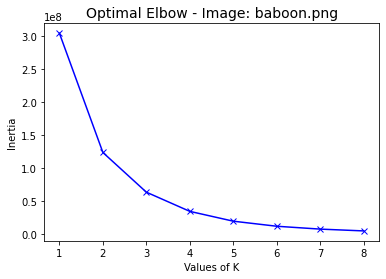

Image Name: flowers.png


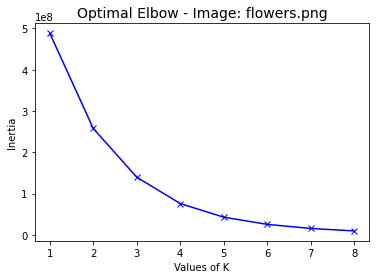

Image Name: graffiti.jpg


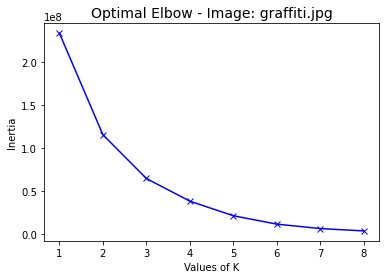

Image Name: lena.png


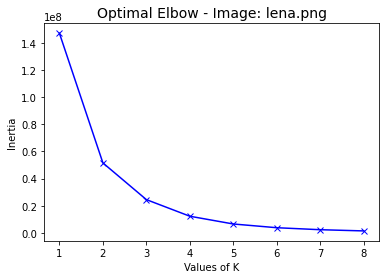

Image Name: umbrella.jpg


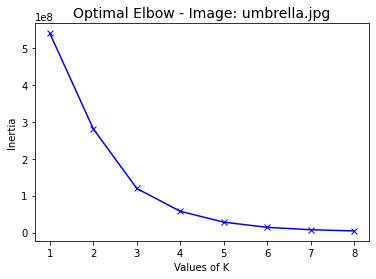

In [22]:
for img_name in image_names:
    print(f'Image Name: {img_name}')
    wcss_scores = imgname_wcss[img_name]
    wcss_scores = [t[1] for t in wcss_scores]
    plot_elbow(wcss_scores, img_name)

#### Trade-Off: Explained Variance & Image Size 

Here we show another way of choosing the value of K, in other words, the number of clusters.

Silhouette analysis is used for understanding the separation distance between the clusters. The Explained Variance (Silhouette coefficient) gives us an idea about the distance between a sample and the neighboring clusters. It has a range of [-1, 1]. Therefore, a value close to 1 indicates that the sample is far away from the neghboring clusters. A value of 0 indicates that the sample is very close to the neighboring clusters and those samples might have been assigned to the wrong cluster.  

Image Name: baboon.png


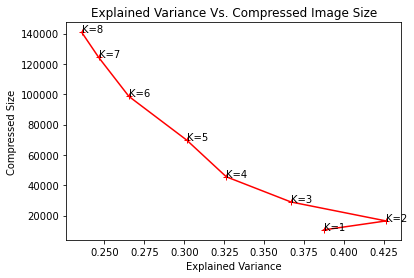

Image Name: flowers.png


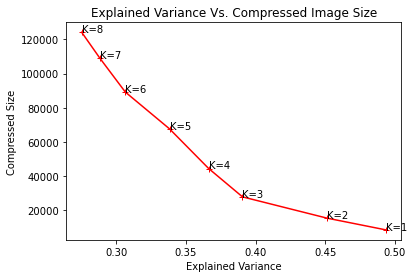

Image Name: graffiti.jpg


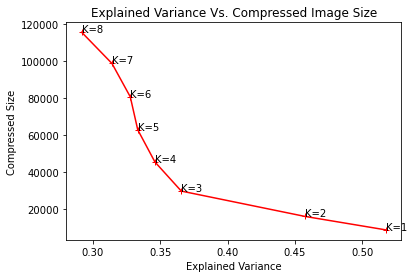

Image Name: lena.png


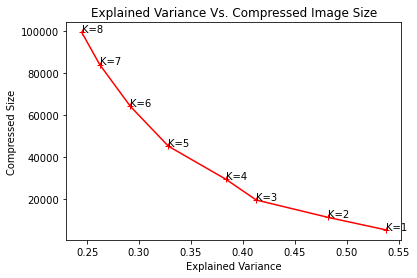

Image Name: umbrella.jpg


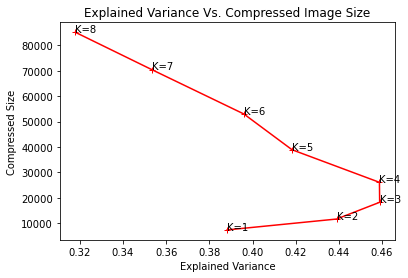

In [23]:
K = [f'K={i}' for i in range(1, 9)]
for img_name in image_names:
    print(f'Image Name: {img_name}')
    var_scores = imgname_explained_var[img_name]
    sizes = imgname_compressed_sizes[img_name]
    fig, ax = plt.subplots()
    ax.plot(var_scores, sizes, 'r+-')
    plt.title('Explained Variance Vs. Compressed Image Size')
    plt.xlabel('Explained Variance')
    plt.ylabel('Compressed Size')
    for i, txt in enumerate(K):
        ax.annotate(txt, (var_scores[i], sizes[i]))
    plt.show()

#### Original Vs. Best Quality



Finally, we show here a comparison between the original images and the best quality compressed image. 

In [26]:
compressed_sizes = []
best_ks = [2, 3, 3, 3, 3] # best k vlaue chosen while considering the varinace and the least memory requirment
original_sizes = [651142, 615128, 1075269, 473831, 279534] # extracted above 
compressed_vars = []
for best_k, image_name in zip(best_ks, image_names):
    var = imgname_explained_var[image_name][best_k-1] 
    size = imgname_compressed_sizes[image_name][best_k-1]
    compressed_sizes.append(size)
    compressed_vars.append(var)

compare_dict = {'Image Name': image_names, 'Original Size': original_sizes, 'Compressed Size': compressed_sizes, 'Explained Variance': compressed_vars}
pd.DataFrame(compare_dict)

Image Name  Original Size  Compressed Size  Explained Variance
0    baboon.png         651142            16499            0.426190
1   flowers.png         615128            27832            0.390555
2  graffiti.jpg        1075269            29821            0.365531
3      lena.png         473831            19610            0.412836
4  umbrella.jpg         279534            18277            0.458912